<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [4]:
#RT function
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [ ]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    incon = np.zeros(N)
    fcon = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    ar = np.array([fcon(xi) for xi in incon])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon
    total = df['right'].sum()
    return total/N


In [ ]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('probability')
    plt.ylabel('accuracy')
    return plt.show()

In [ ]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x000002355AAD9310>


In [11]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon
    print('whole dataframe', '\n' , df)
    df1 = df.loc[lambda df: df['right'] == 1]
    df1['time'] = pd.to_numeric(df1['time'])
    print('new dataframe', '\n', df1)
    print(df1.describe())
    average_rtime = df1['time'].mean()

    return average_rtime

print('av time is',df_average(n=6))

whole dataframe 
    intention  answer time  right  con
0     global  global   78      1  0.0
1     global  global   39      1  0.0
2     global  global   59      1  0.0
3     global  global   16      1  0.0
4     global  global   72      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   33      1  0.0
96    global  global   24      1  0.0
97    global  global   22      1  0.0
98    global  global   33      1  0.0
99    global  global   24      1  0.0

[100 rows x 5 columns]
new dataframe 
    intention  answer  time  right  con
0     global  global    78      1  0.0
1     global  global    39      1  0.0
2     global  global    59      1  0.0
3     global  global    16      1  0.0
4     global  global    72      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    33      1  0.0
96    global  global    24      1  0.0
97    global  global    22      1  0.0
98    global  global    33      1  0.0
99    global  global    24      1  0.0

[99 rows x 5 colu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   66      1  0.0
1     global  global   41      1  0.0
2     global  global  111      1  0.0
3     global  global  222      1  0.0
4     global  global   24      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   13      1  0.0
96    global  global  102      1  0.0
97    global  global  146      1  0.0
98    global  global   33      1  0.0
99    global  global   73      1  0.0

[100 rows x 5 columns]
new dataframe 
    intention  answer  time  right  con
0     global  global    66      1  0.0
1     global  global    41      1  0.0
2     global  global   111      1  0.0
3     global  global   222      1  0.0
4     global  global    24      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    13      1  0.0
96    global  global   102      1  0.0
97    global  global   146      1  0.0
98    global  global    33      1  0.0
99    global  global    73      1  0.0

[91 rows x 5 colu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   52      1  0.0
1     global  global   16      1  0.0
2     global  global   21      1  0.0
3     global  global   17      1  0.0
4     global  global   19      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   39      1  0.0
96    global  global   21      1  0.0
97    global  global   57      1  0.0
98    global  global  111      1  0.0
99    global  global   12      1  0.0

[100 rows x 5 columns]
new dataframe 
    intention  answer  time  right  con
0     global  global    52      1  0.0
1     global  global    16      1  0.0
2     global  global    21      1  0.0
3     global  global    17      1  0.0
4     global  global    19      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    39      1  0.0
96    global  global    21      1  0.0
97    global  global    57      1  0.0
98    global  global   111      1  0.0
99    global  global    12      1  0.0

[99 rows x 5 colu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   42      1  0.0
1     global  global   53      1  0.0
2     global  global   48      1  0.0
3     global  global   14      1  0.0
4     global  global   62      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   21      1  0.0
96    global  global   39      1  0.0
97    global  global   47      1  0.0
98    global  global   31      1  0.0
99    global  global   22      1  0.0

[100 rows x 5 columns]
new dataframe 
    intention  answer  time  right  con
0     global  global    42      1  0.0
1     global  global    53      1  0.0
2     global  global    48      1  0.0
3     global  global    14      1  0.0
4     global  global    62      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    21      1  0.0
96    global  global    39      1  0.0
97    global  global    47      1  0.0
98    global  global    31      1  0.0
99    global  global    22      1  0.0

[99 rows x 5 colu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


            time  right   con
count  99.000000   99.0  99.0
mean   26.646465    1.0   0.0
std    12.358021    0.0   0.0
min     9.000000    1.0   0.0
25%    16.000000    1.0   0.0
50%    24.000000    1.0   0.0
75%    34.000000    1.0   0.0
max    64.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   58      1  0.0
1     global  global   24      1  0.0
2     global  global   41      1  0.0
3     global  global   27      1  0.0
4     global  global   58      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   26      1  0.0
96    global  global   22      1  0.0
97    global  global   26      1  0.0
98    global  global   50      1  0.0
99    global  global   27      1  0.0

[100 rows x 5 columns]
new dataframe 
    intention  answer  time  right  con
0     global  global    58      1  0.0
1     global  global    24      1  0.0
2     global  global    41      1  0.0
3     global  global    27      1  0.0
4     global  global 

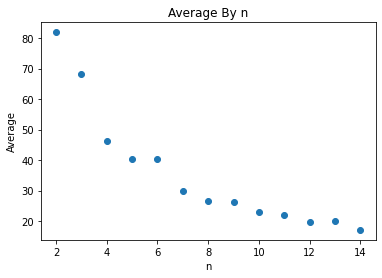

None


In [12]:
def plot_average_by_n(N=100, min=2, max=15, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    plt.scatter(n_range, ar_av)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    return plt.show()

print(plot_average_by_n())    

In [ ]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df()